<a href="https://colab.research.google.com/github/Slimani-CE/AI-Python-Implemention/blob/main/Polynomial%20regression%20with%20gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [773]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
np.random.seed(0)

# Importing the dataset

In [774]:
dataset = pd.read_csv('iris.csv')

In [775]:
dataset.shape

(150, 5)

In [776]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Polynomial model

In [777]:
def model(X, W, b):
    return X.dot(W) + b
# The next line is just for illustration
model(np.array([[3, 3**2], [2, 2**2], [5, 5**2]]), np.array([[1], [2]]), 3)

array([[24],
       [13],
       [58]])

# Cost function

In [778]:
def cost_function(X, y, W, b):
    m = len(y)
    y_pred = model(X, W, b)
    return 1 / (2*m) * np.sum((y_pred - y)**2)

# Gradient descent

In [779]:
def gradient_descent(X, y, W, b, learning_rate, n_iterations):
    
    # X.shape = (m, n)
    # y.shape = (m, 1)
    # W.shape = (n, )
    # learning_rate : double
    # n_iterations : integer

    cost_history = []  # cost_history.shape = (n_iterations, )
    m = X.shape[0]

    for i in range(0, n_iterations):
        y_pred = model(X, W, b)  # y_pred.shape = (m, 1)

        W = W - learning_rate * (1 / m) * ( X.T.dot(y_pred - y) )
        b = b - learning_rate * (1 / m) * sum(y_pred - y)
        cost_history.append(cost_function(X, y, W, b))
        
    return W, b, cost_history

## Predict sepal_width based on petal_length

In [780]:
x = dataset['petal_length'].values.reshape(-1, 1)
y = dataset['sepal_width'].values.reshape(-1, 1)

In [781]:
print(x.shape)
print(y.shape)

(150, 1)
(150, 1)


## Create polynomial features

In [782]:
X=np.hstack((x, x**2))

## Generate parameters

In [783]:
np.random.seed(0) 
W = np.random.random((X.shape[1], 1))
b = np.random.random(1)
print('W : ', W)
print("b : ", b)

W :  [[0.5488135 ]
 [0.71518937]]
b :  [0.60276338]


## Plot pretrained model

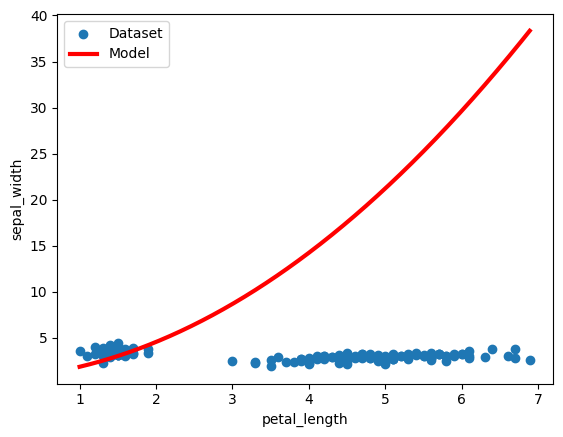

In [793]:
plt.scatter(X[:, 0], y[:, 0], label = 'Dataset')

grid_X = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01).reshape(-1, 1)
grid_X = np.hstack((grid_X, grid_X**2))

predictions = model(grid_X, W, b)

plt.plot(grid_X[:, 0], predictions[:, 0], c = 'red', label = 'Model', linewidth = 3)


plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

## Training the model

In [785]:
n_iterations = 30000
learning_rate = 0.004

W_final, b_final, cost_history = gradient_descent(X, y, W, b, learning_rate, n_iterations)
print(f"Iteration {1:3d}: {cost_history[0]}")
for i in range(len(cost_history)):
  if (i+1) % 5000 == 0:
    print(f"Iteration {i:3d}: {cost_history[i]}")

Iteration   1: 96.52460799862132
Iteration 4999: 0.1184278951615186
Iteration 9999: 0.07536353947908164
Iteration 14999: 0.063163138739287
Iteration 19999: 0.05970668906407947
Iteration 24999: 0.0587274552985627
Iteration 29999: 0.05845003226115936


In [786]:
b_final

array([4.16208637])

In [787]:
print(W_final)
print(b_final)

[[-0.65917833]
 [ 0.07940478]]
[4.16208637]


## Plot trained model

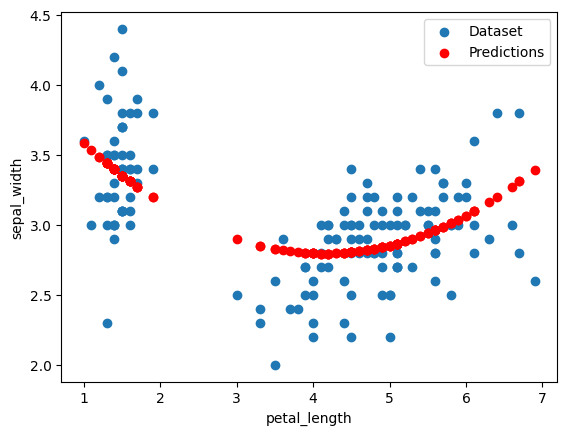

In [788]:
predictions = model(X, W_final, b_final) 

plt.scatter(X[:, 0], y[:, 0], label='Dataset')
plt.scatter(X[:, 0], predictions[:, 0], c = 'r', label = 'Predictions')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

## High resolution plot

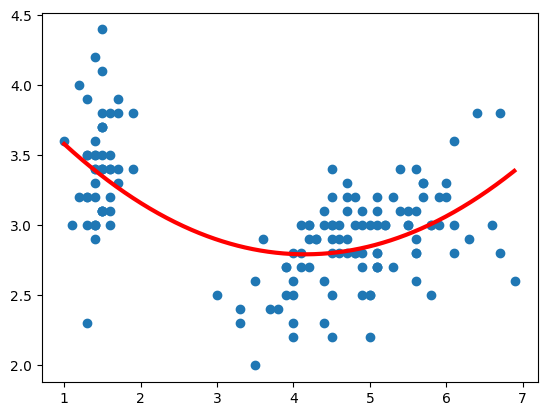

In [789]:
grid_X = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01).reshape(-1, 1)
grid_X = np.hstack((grid_X,grid_X**2))
plt.scatter(X[:, 0], y[:, 0], label = 'Dataset')

predictions = model(grid_X, W_final, b_final)

plt.plot(grid_X[:, 0], predictions[:, 0], c = 'red', label = 'Model', linewidth = 3)

# Using sklearn libraries

## Importing the dataset

In [790]:
dataset = pd.read_csv('iris.csv')
X_ = dataset[['petal_length']]
y_ = dataset['sepal_width']

## Training the dataset on the polynomial model

In [791]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Polynomial Regression results

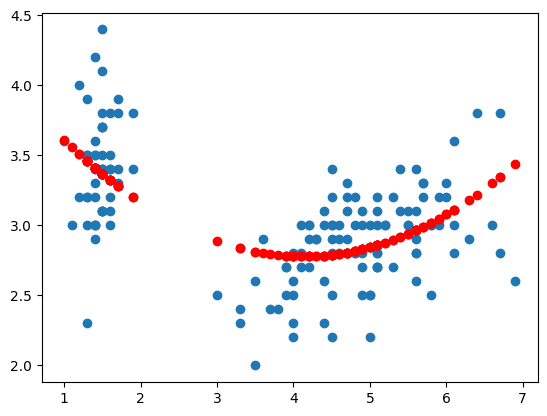

In [792]:
# Plot results
ypred_poly = lin_reg_2.predict(X_poly)
plt.scatter(X_, y_)
plt.scatter(X_, ypred_poly, color = 'red')